In [2]:
import pandas as pd
import numpy as np


In [3]:
columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
cars = pd.read_table("/content/auto-mpg.data-original", delim_whitespace=True,names=columns)
print(cars.head(5))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   

   model year  origin                   car name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0              amc rebel sst  
4        70.0     1.0                ford torino  


<ipython-input-3-db7704da2ff9>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cars = pd.read_table("/content/auto-mpg.data-original", delim_whitespace=True,names=columns)


# Exploratory Data Analysis

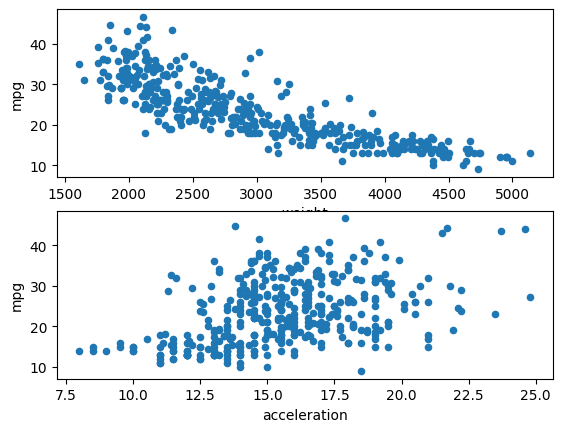

In [4]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
cars.plot('weight','mpg',kind='scatter',ax=ax1)
cars.plot('acceleration','mpg',kind='scatter',ax=ax2)
plt.show()

The above scatterplot shows a strong negative linear relationship between weight and mpg and a weak positive relationship between acceleration and mpg.

# Fitting the Regression **Model**

In [7]:
# Check for missing values in 'mpg'
print(cars['mpg'].isnull().sum())

# Option 1: Remove rows with missing values
cars = cars.dropna(subset=['mpg'])

# Option 2: Impute missing values with the mean
cars['mpg'] = cars['mpg'].fillna(cars['mpg'].mean())

8


<ipython-input-7-aa1e184e8713>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['mpg'] = cars['mpg'].fillna(cars['mpg'].mean())


In [8]:
lr = LinearRegression()
lr.fit(cars[["weight"]].values, cars["mpg"])

LinearRegression()

# Making **Predictions**

In [9]:
predictions=lr.predict(cars[["weight"]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


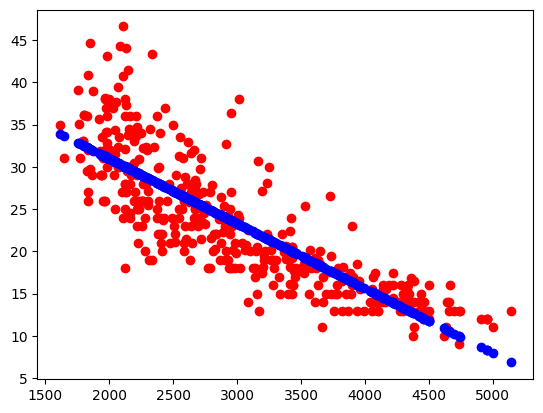

In [10]:
plt.scatter(cars['weight'],cars['mpg'],c="red")
plt.scatter(cars['weight'],predictions,c='blue')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error as mean_sq_err

mse=mean_sq_err(cars['mpg'],predictions)
print("Mean Squared Error =",mse)

Mean Squared Error = 18.780939734628394


In [12]:
rmse = mse ** 0.5
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  4.333698159150957


In [13]:
filtered_cars = cars[cars["horsepower"] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

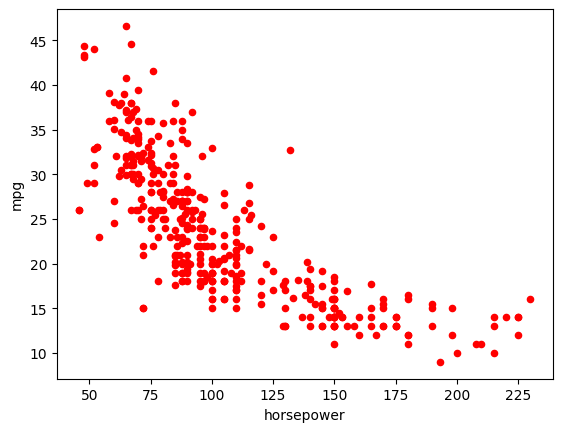

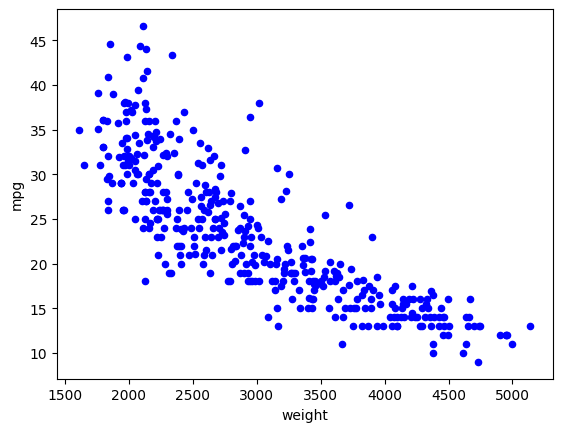

In [14]:
filtered_cars.plot('horsepower','mpg', kind='scatter',c='red')
filtered_cars.plot('weight','mpg', kind='scatter',c='blue')
plt.show()

In [16]:
filtered_cars = filtered_cars.dropna(subset=['horsepower', 'mpg'])

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Or 'median', etc.
filtered_cars[['horsepower', 'mpg']] = imputer.fit_transform(filtered_cars[['horsepower', 'mpg']])

<ipython-input-18-84085d6b0c42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cars[['horsepower', 'mpg']] = imputer.fit_transform(filtered_cars[['horsepower', 'mpg']])


In [19]:
lr = LinearRegression()
lr.fit(filtered_cars[['horsepower']],filtered_cars[['mpg']])
predictions = lr.predict(filtered_cars[['horsepower']])

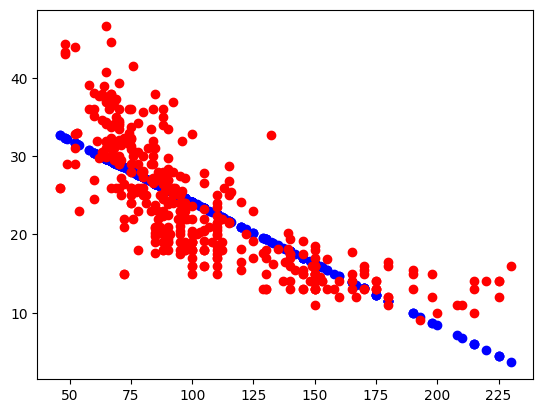

In [20]:
plt.scatter(filtered_cars['horsepower'],predictions,c='blue')
plt.scatter(filtered_cars['horsepower'],filtered_cars['mpg'],c='red')
plt.show()

In [21]:
mse = mean_sq_err(predictions, filtered_cars['mpg'])
rmse = mse ** 0.5
print("Mean Square Error =",mse)
print("Root Mean Square Error =",rmse)

Mean Square Error = 23.943662938603108
Root Mean Square Error = 4.893226230065713
